# The Spark Foundation - #GRIPNOVEMBER2021

# Data Science & Business Analytics Internship


# #TASK-2 : Prediction using Unsupervised ML

# BY NITHYA SHARMA

# Problem Statement: Predict the optimum number of clusters and visualize it.

In [1]:
#IMPORTING THE LIBRARIES
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import matplotlib.patches as mpatches
import seaborn as sns
import sklearn.metrics as sm
from mpl_toolkits.mplot3d import Axes3D
from scipy.cluster.hierarchy import linkage,dendrogram
from sklearn.cluster import DBSCAN 
from sklearn.decomposition import PCA

In [2]:
#IMPORTING THE DATASET
df = pd.read_csv(r"C:\Users\nithy\Downloads\IRIS.csv")
print("Iris' data imported successfully")

Iris' data imported successfully


In [3]:
df.head() 

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# EXPLORATORY DATA ANALYSIS

In [4]:
df.shape

(150, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

# Splitting the dataset

In [28]:
x = pd.DataFrame(df, columns=['sepal_length','sepal_width','petal_length','petal_width','species'])
y = pd.DataFrame(df, columns=['Target'])

In [29]:
x

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


 How do you find the optimum number of clusters for K Means? How does one determine the value of K?
K-Means clustering is an unsupervised machine learning algorithm. In contrast to traditional supervised machine learning algorithms, K-Means attempts to classify data without having first been trained with labeled data. It is a clustering method which is used to subdivide the main clusters into smaller number of clusters or sub groups.

In [30]:
# Finding the optimum number of clusters for K-means classification
x = df.iloc[:, [0, 1, 2, 3]].values
from sklearn.cluster import KMeans

# Within-Cluster Sum of Square (WCSS) is the sum of squared distance between each point and the centroid in a cluster
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(x)
    
    # Appending the WCSS to the list (kmeans.inertia_ returns the WCSS value for an initialized cluster)
    wcss.append(kmeans.inertia_) 
    print("k=", i, "wcss:", kmeans.inertia_)

k= 1 wcss: 680.8243999999996
k= 2 wcss: 152.36870647733915
k= 3 wcss: 78.94084142614601
k= 4 wcss: 57.34540931571815
k= 5 wcss: 46.535582051282034
k= 6 wcss: 38.93873974358975
k= 7 wcss: 34.190687924796634
k= 8 wcss: 29.90537429982511
k= 9 wcss: 27.927882157034986
k= 10 wcss: 25.955497086247092


In [31]:
#Finding the optimum number of clusters using k-means.

**Observation: WCSS values of 1 to 10 is shown**

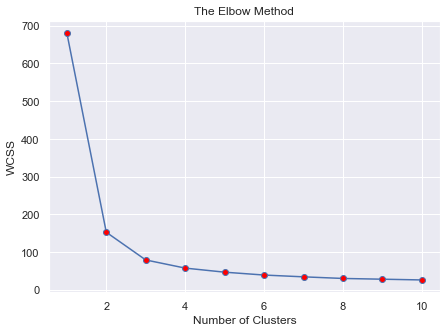

In [32]:
# Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.figure(figsize=(7,5))
plt.plot(range(1,11), wcss, marker='o', markerfacecolor='red')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Observation: The graph is drastically decreasing from 0 to 4 and we can see that after 3, the drop in WCSS is minimal. So we choose 3 as the optimal number of clusters.
You can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration. From this we choose the number of clusters as "3".

In [33]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

In [34]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

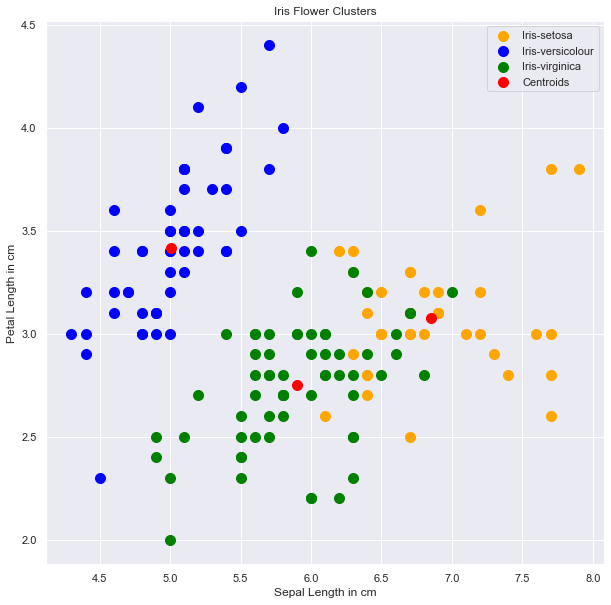

In [35]:
# Visualising the clusters - On the first two columns
plt.figure(figsize=(10,10))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'orange', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')
plt.title('Iris Flower Clusters')
plt.xlabel('Sepal Length in cm')
plt.ylabel('Petal Length in cm')
plt.legend()
plt.show()


In [36]:
iris_k_mean_model = KMeans(n_clusters=3)
iris_k_mean_model.fit(x)

KMeans(n_clusters=3)

In [37]:
print(iris_k_mean_model.cluster_centers_)

[[6.85       3.07368421 5.74210526 2.07105263]
 [5.006      3.418      1.464      0.244     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]]


# DATA VISUALIZATION

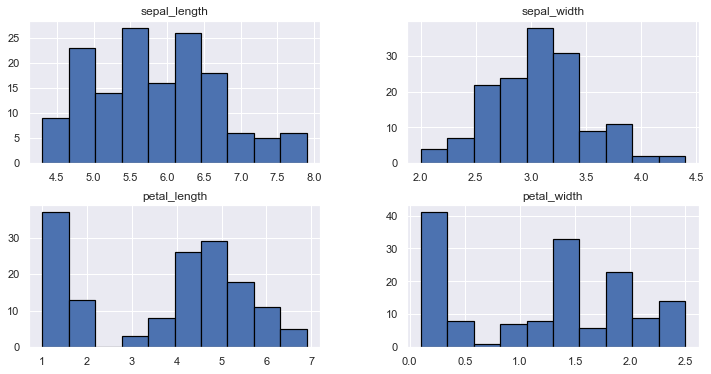

In [38]:
#bar graph
df.hist(edgecolor='black', linewidth=1.2)
fig = plt.gcf()
fig.set_size_inches(12,6)
plt.show()

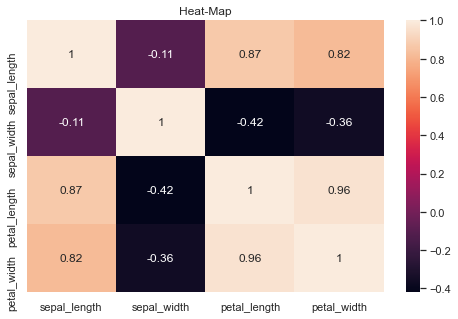

In [39]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(), annot=True)
plt.title("Heat-Map")
plt.show()

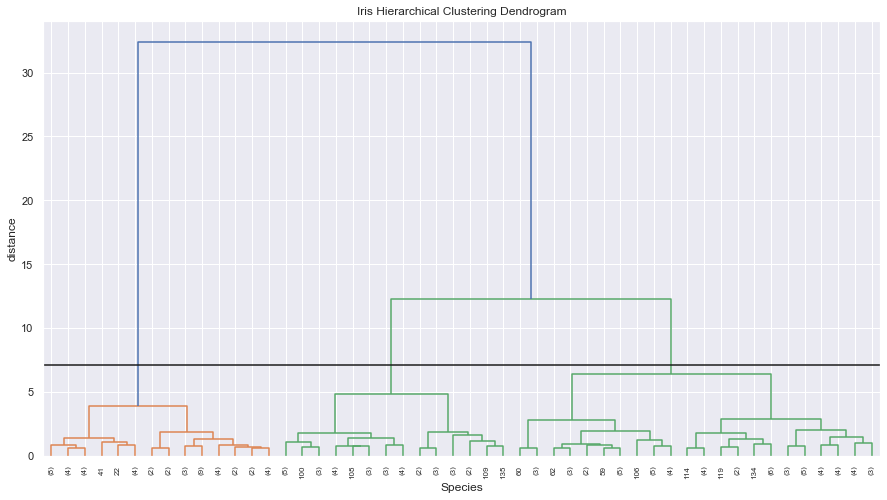

In [40]:
#Hierachy Clustering 
hier=linkage(x,"ward")
max_d=7.08
plt.figure(figsize=(15,8))
plt.title('Iris Hierarchical Clustering Dendrogram')
plt.xlabel('Species')
plt.ylabel('distance')
dendrogram(
    hier,
    truncate_mode='lastp',  
    p=50,                  
    leaf_rotation=90.,      
    leaf_font_size=8.,     
)
plt.axhline(y=max_d, c='k')
plt.show()

Cluster with orange shade is Iris-setosa.

Cluster with blue shade is iris-versicolour.

Cluster with green shade is Iris-virginica.

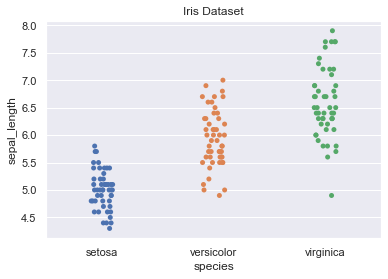

In [41]:
# Using Strip Plot to draw a scatter plot based on the category
sns.set(style = 'darkgrid')
iris = sns.load_dataset('iris');
ax = sns.stripplot(x ='species', y ='sepal_length', data = iris);
plt.title('Iris Dataset')
plt.show()

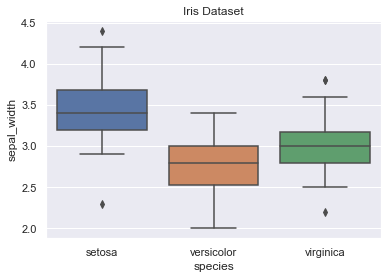

In [42]:
# Using Box Plot to visualize distributions for comparison of data between two groups
sns.boxplot(x='species', y='sepal_width', data=iris)
plt.title("Iris Dataset")
plt.show()

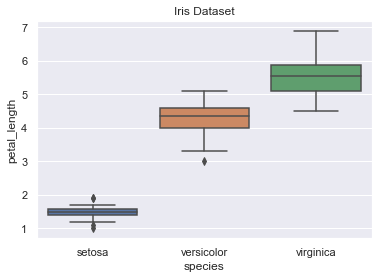

In [43]:
sns.boxplot(x='species', y='petal_length', data=iris)
plt.title("Iris Dataset")
plt.show()

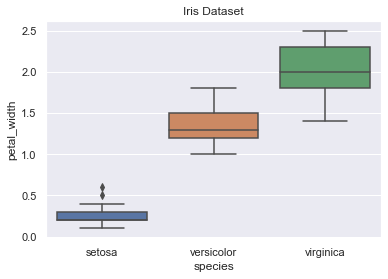

In [44]:
sns.boxplot(x='species', y='petal_width', data=iris)
plt.title("Iris Dataset")
plt.show()

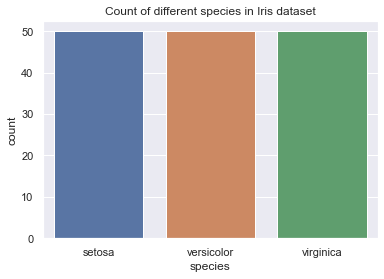

In [45]:
# Using Count Plot to show the counts of observations in each categorical bin using bars.
sns.countplot(x='species', data=iris)
plt.title("Count of different species in Iris dataset")
plt.show()

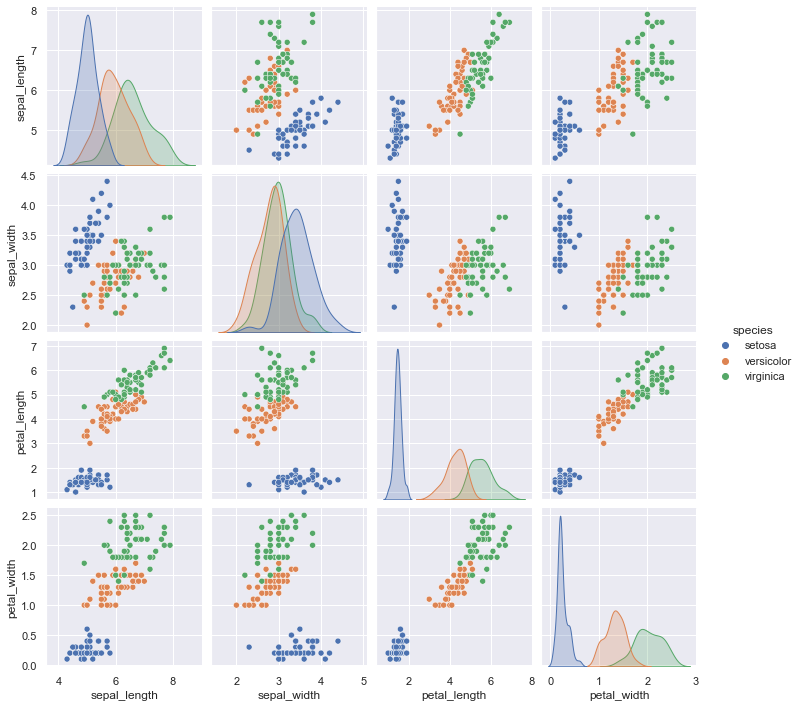

In [46]:
# Using Pair Plot to organize multiple pairwise bivariate distributions 
sns.pairplot(iris, hue='species');

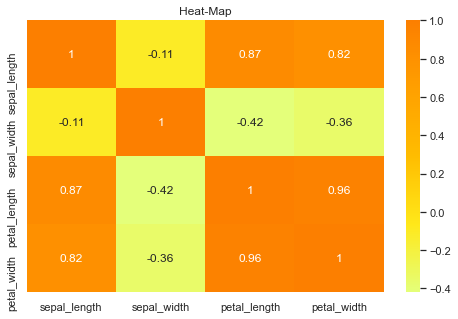

In [47]:
# Using Heat Map to represent various shades of colour for each value to be plotted.
# Darker shades of the chart represent higher values than the lighter shade. 
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(), annot=True, cmap='Wistia')
plt.title("Heat-Map")
plt.show()

# **✨THANK YOU✨**